In [4]:
# import required libraries
import csv
import string
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image as im
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [6]:
train_data="/content/sign_mnist_test.csv"
test_data="/content/sign_mnist_test.csv"

In [7]:
with open(train_data) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

In [8]:
def parse_data(filename):
  """
  Parses the images and labels from a CSV file

  Args:
    filename (string): path to the CSV file

  Returns:
    images, labels: tuple of numpy arrays containing the images and labels
  """
  with open(filename) as file:
    csv_reader = csv.reader(file, delimiter=',')
    next(csv_reader,None)
    labels=[]
    images=[]
    for i in csv_reader:
      label=i[0]
      label=np.array(label,dtype='float64')
      labels.append(label)
      pixels = i[1:]
      pixels = np.array(pixels, dtype='float64')
      # reshape the array into 28 x 28 array (as images are 28x28)
      pixels = pixels.reshape(28, 28)
      images.append(pixels)
    labels=np.array(labels)
    images=np.array(images)

    return images, labels

In [10]:
training_images, training_labels = parse_data(train_data)
validation_images, validation_labels = parse_data(test_data)

print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (7172, 28, 28) and dtype: float64
Training labels has shape: (7172,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


# Visualizing the numpy arrays


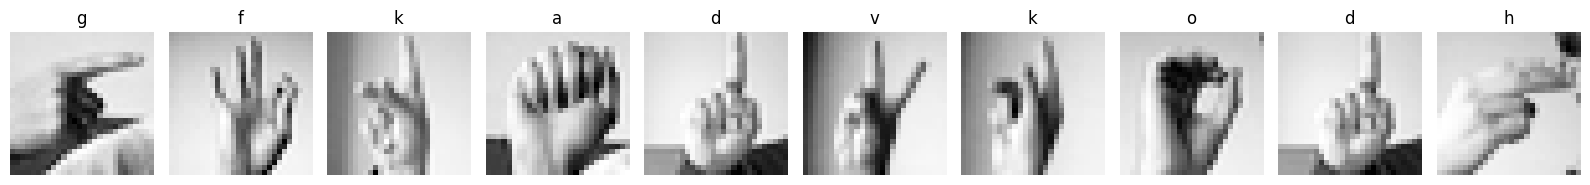

In [11]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [12]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train CSV file
    training_labels (array): parsed labels from the train CSV file
    validation_images (array): parsed images from the test CSV file
    validation_labels (array): parsed labels from the test CSV file

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # adding the "color" dimension for the data
  training_images = np.expand_dims(training_images,-1)
  validation_images = np.expand_dims(validation_images,-1)

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,)

  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)

  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)

  return train_generator, validation_generator

In [13]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (7172, 28, 28, 1)
Labels of training generator have shape: (7172,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


# Creating model

In [14]:
def create_model():

  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])


  model.compile(optimizer = 'rmsprop',
                loss = "sparse_categorical_crossentropy",
                metrics=['accuracy'])

  return model

# Train the model

In [15]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)

Epoch 1/15
225/225 [==============================] - 11s 44ms/step - loss: 3.1452 - accuracy: 0.0764 - val_loss: 2.9612 - val_accuracy: 0.1740
Epoch 2/15
225/225 [==============================] - 9s 42ms/step - loss: 2.8213 - accuracy: 0.1682 - val_loss: 2.1320 - val_accuracy: 0.3903
Epoch 3/15
225/225 [==============================] - 10s 44ms/step - loss: 2.4139 - accuracy: 0.2765 - val_loss: 1.6219 - val_accuracy: 0.5280
Epoch 4/15
225/225 [==============================] - 11s 50ms/step - loss: 2.0289 - accuracy: 0.3773 - val_loss: 1.3611 - val_accuracy: 0.6090
Epoch 5/15
225/225 [==============================] - 12s 53ms/step - loss: 1.7345 - accuracy: 0.4547 - val_loss: 1.0387 - val_accuracy: 0.6694
Epoch 6/15
225/225 [==============================] - 11s 47ms/step - loss: 1.5024 - accuracy: 0.5279 - val_loss: 0.8232 - val_accuracy: 0.7540
Epoch 7/15
225/225 [==============================] - 12s 51ms/step - loss: 1.3477 - accuracy: 0.5712 - val_loss: 0.6573 - val_accuracy: 

# Visualize the accuracy and loss for training and validation data

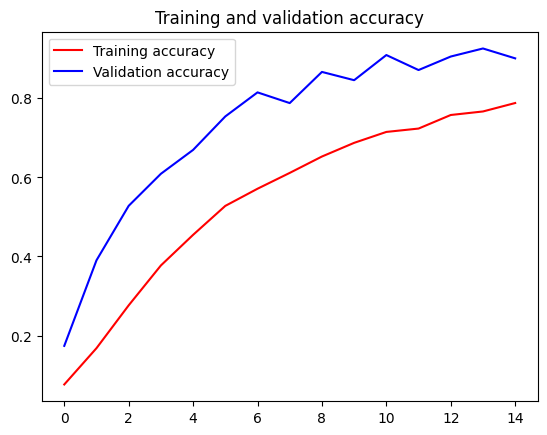

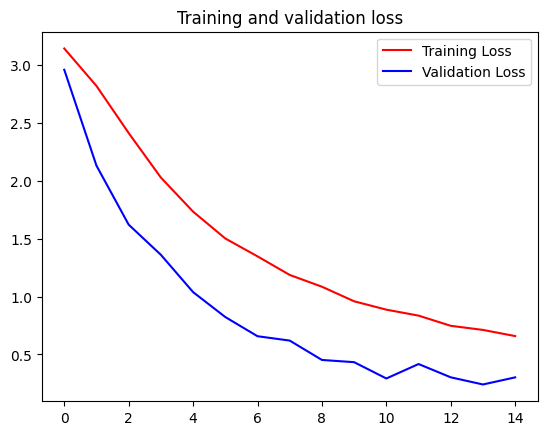

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()